In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [99]:
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

# Analyze Data

In [100]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [101]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [102]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [103]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [106]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [107]:
#combine data
# train['train_test'] = 1
# test['train_test'] = 0
test['Survived'] = np.NaN
combine_data = pd.concat([train, test])
combine_data

PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male   NaN      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male   NaN      0   
417                           Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  
0        0           A/5 21171    7.2500   NaN        S  
1        0            PC 17599   71.2833   C85        C  
2        0    STON/O2. 3101282    7.9250   NaN        S  
3        0              113803   53.1000  C123        S  
4        0              373450    8.0500   NaN        S  
..     ...                 ...       ...   ...      ...  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]

In [108]:
test['Survived']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
413   NaN
414   NaN
415   NaN
416   NaN
417   NaN
Name: Survived, Length: 418, dtype: float64

In [109]:
combine_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

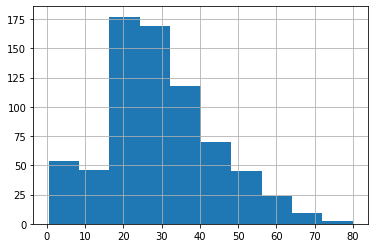

In [110]:
train.Age.hist()

<AxesSubplot:>

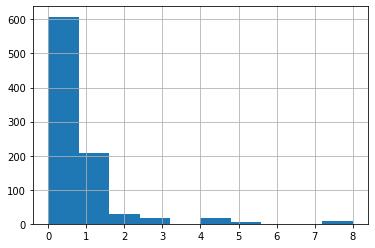

In [111]:
train.SibSp.hist()

<AxesSubplot:>

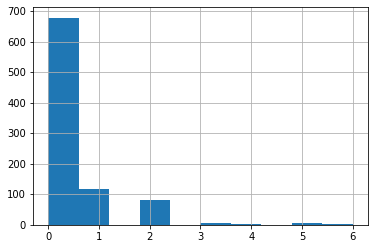

In [112]:
train.Parch.hist()

In [113]:
pd.pivot_table(train, index = ['Survived'], values = ['Age'])

Age
Survived           
0         30.626179
1         28.343690

In [114]:
pd.pivot_table(train, index = ['Survived'], values = ['Age', 'Parch', 'SibSp'])

Age     Parch     SibSp
Survived                               
0         30.626179  0.329690  0.553734
1         28.343690  0.464912  0.473684

In [115]:
pd.pivot_table(train, index = 'Survived', columns = 'Parch', values = 'Ticket', aggfunc = 'count')

Parch         0     1     2    3    4    5    6
Survived                                       
0         445.0  53.0  40.0  2.0  4.0  4.0  1.0
1         233.0  65.0  40.0  3.0  NaN  1.0  NaN

In [116]:
pd.pivot_table(train, index = 'Survived', columns = 'SibSp', values = 'Ticket', aggfunc = 'count')

SibSp         0      1     2     3     4    5    8
Survived                                          
0         398.0   97.0  15.0  12.0  15.0  5.0  7.0
1         210.0  112.0  13.0   4.0   3.0  NaN  NaN

In [117]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [118]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [119]:
train[['Age', 'Parch', 'SibSp', 'Fare']].corr()

Age     Parch     SibSp      Fare
Age    1.000000 -0.189119 -0.308247  0.096067
Parch -0.189119  1.000000  0.414838  0.216225
SibSp -0.308247  0.414838  1.000000  0.159651
Fare   0.096067  0.216225  0.159651  1.000000

<AxesSubplot:>

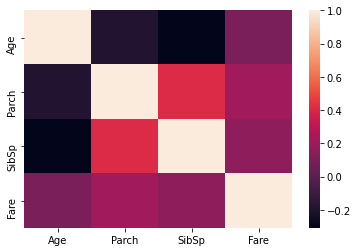

In [120]:
sns.heatmap(train[['Age', 'Parch', 'SibSp', 'Fare']].corr())

In [121]:
df_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

graph for Survived: total = 2


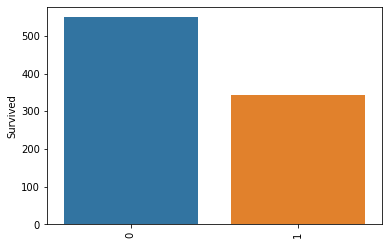

graph for Pclass: total = 3


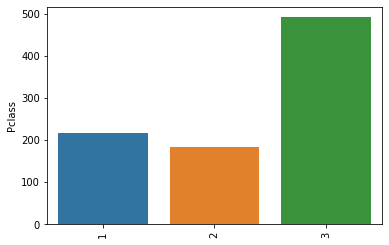

graph for Sex: total = 2


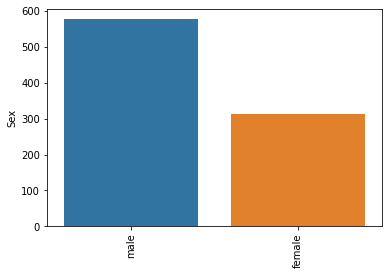

graph for Ticket: total = 681


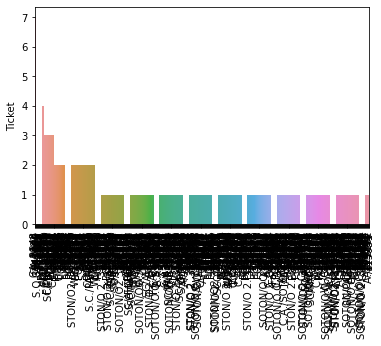

graph for Cabin: total = 147


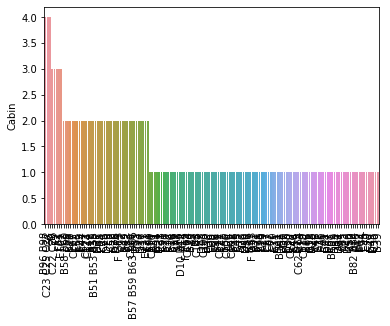

graph for Embarked: total = 3


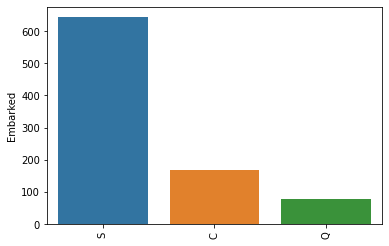

In [122]:
#it will give us bar chart of above defined categories and their value counts in every graph
#so this will be informative
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [123]:
pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = 'count')

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

In [124]:
pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count')

Sex       female  male
Survived              
0             81   468
1            233   109

In [125]:
pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count')

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

In [126]:
pd.pivot_table(train, index = 'Survived', columns = 'Cabin', values = 'Ticket' ,aggfunc ='count')

Cabin     A10  A14  A16  A19  A20  A23  A24  A26  A31  A32  ...   E8  F E69  \
Survived                                                    ...               
0         1.0  1.0  NaN  1.0  NaN  NaN  1.0  NaN  NaN  1.0  ...  NaN    NaN   
1         NaN  NaN  1.0  NaN  1.0  1.0  NaN  1.0  1.0  NaN  ...  2.0    1.0   

Cabin     F G63  F G73   F2  F33  F38   F4   G6    T  
Survived                                              
0           1.0    2.0  1.0  NaN  1.0  NaN  2.0  1.0  
1           NaN    NaN  2.0  3.0  NaN  2.0  2.0  NaN  

[2 rows x 147 columns]

In [127]:
train_test_data = [train,test] # combine dataset

# Feature Engineering

In [128]:
train['Title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [129]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Jonkheer          1
Sir               1
Capt              1
Mme               1
Don               1
Lady              1
Ms                1
the Countess      1
Name: Title, dtype: int64

In [130]:
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked Title  
0        0         A/5 21171   7.2500   NaN        S    Mr  
1        0          PC 17599  71.2833   C85        C   Mrs  
2        0  STON/O2. 3101282   7.9250   NaN        S  Miss  
3        0            113803  53.1000  C123        S   Mrs  
4        0            373450   8.0500   NaN        S    Mr  
..     ...               ...      ...   ...      ...   ...  
886      0            211536  13.0000   NaN        S   Rev  
887      0            112053  30.0000   B42        S  Miss  
888      2        W./C. 6607  23.4500   NaN        S  Miss  
889      0            111369  30.0000  C148        C    Mr  
890      0            370376   7.7500   NaN        Q    Mr  

[891 rows x 13 columns]

In [131]:
test['Title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['Title'].value_counts()

Mr        228
Miss      101
Mrs        58
Master     23
Dr          3
Rev         3
Don         1
Mme         1
Name: Title, dtype: int64

In [132]:
pd.pivot_table(train, index = 'Title', columns = 'Survived', values = 'Ticket', aggfunc = 'count')

Survived          0      1
Title                     
Capt            1.0    NaN
Col             1.0    1.0
Don             1.0    NaN
Dr              4.0    3.0
Jonkheer        1.0    NaN
Lady            NaN    1.0
Major           1.0    1.0
Master         17.0   23.0
Miss           55.0  127.0
Mlle            NaN    2.0
Mme             NaN    1.0
Mr            436.0   81.0
Mrs            26.0   99.0
Ms              NaN    1.0
Rev             6.0    NaN
Sir             NaN    1.0
the Countess    NaN    1.0

In [133]:
combine_data['Title'] = combine_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
combine_data

PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male   NaN      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male   NaN      0   
417                           Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked   Title  
0        0           A/5 21171    7.2500   NaN        S      Mr  
1        0            PC 17599   71.2833   C85        C     Mrs  
2        0    STON/O2. 3101282    7.9250   NaN        S    Miss  
3        0              113803   53.1000  C123        S     Mrs  
4        0              373450    8.0500   NaN        S      Mr  
..     ...                 ...       ...   ...      ...     ...  
413      0           A.5. 3236    8.0500   NaN        S      Mr  
414      0            PC 17758  108.9000  C105        C    Dona  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr  
416      0              359309    8.0500   NaN        S      Mr  
417      1                2668   22.3583   NaN        C  Master  

[1309 rows x 13 columns]

In [134]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [135]:
#we saw embarked has 2 null values so we fill it with the max which is S class
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [136]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [137]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [138]:
#now we'll add median of age in all null val of age
for dataset in train_test_data:
    dataset['Age'] = dataset['Age'].fillna(train.Age.median())

In [139]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [140]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived       418
Title            0
dtype: int64

In [141]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train.Fare.median())

In [142]:
combine_data['Age'] = combine_data['Age'].fillna(combine_data.Age.median())
combine_data['Fare'] = combine_data['Fare'].fillna(combine_data.Fare.median())
combine_data['Embarked'] = combine_data['Embarked'].fillna('S')

In [143]:
df_cat.Cabin
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [144]:
train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [145]:
pd.pivot_table(train, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0

In [146]:
train['cabin_categ'] = train.Cabin.apply(lambda x: str(x)[0])

In [147]:
train.cabin_categ.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_categ, dtype: int64

In [148]:
combine_data['cabin_multiple'] = combine_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
combine_data['cabin_categ'] = combine_data.Cabin.apply(lambda x: str(x)[0])

In [149]:
combine_data

PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male  28.0      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male  28.0      0   
417                           Peter, Master. Michael J    male  28.0      1   

     Parch              Ticket      Fare Cabin Embarked   Title  \
0        0           A/5 21171    7.2500   NaN        S      Mr   
1        0            PC 17599   71.2833   C85        C     Mrs   
2        0    STON/O2. 3101282    7.9250   NaN        S    Miss   
3        0              113803   53.1000  C123        S     Mrs   
4        0              373450    8.0500   NaN        S      Mr   
..     ...                 ...       ...   ...      ...     ...   
413      0           A.5. 3236    8.0500   NaN        S      Mr   
414      0            PC 17758  108.9000  C105        C    Dona   
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S      Mr   
416      0              359309    8.0500   NaN        S      Mr   
417      1                2668   22.3583   NaN        C  Master   

     cabin_multiple cabin_categ  
0                 0           n  
1                 1           C  
2                 0           n  
3                 1           C  
4                 0           n  
..              ...         ...  
413               0           n  
414               1           C  
415               0           n  
416               0           n  
417               0           n  

[1309 rows x 15 columns]

In [170]:
pd.pivot_table(train,index='Survived',columns='cabin_categ', values = 'Name', aggfunc='count')

cabin_categ    A     B     C     D     E    F    G    T      n
Survived                                                      
0            8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1            7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0

In [174]:
all_dummies = pd.get_dummies(combine_data[['Pclass','Sex','Age','SibSp','Parch','cabin_categ', 'cabin_multiple','Embarked','Title']])
all_dummies

Pclass   Age  SibSp  Parch  cabin_multiple  Sex_female  Sex_male  \
0         3  22.0      1      0               0           0         1   
1         1  38.0      1      0               1           1         0   
2         3  26.0      0      0               0           1         0   
3         1  35.0      1      0               1           1         0   
4         3  35.0      0      0               0           0         1   
..      ...   ...    ...    ...             ...         ...       ...   
413       3  28.0      0      0               0           0         1   
414       1  39.0      0      0               1           1         0   
415       3  38.5      0      0               0           0         1   
416       3  28.0      0      0               0           0         1   
417       3  28.0      1      1               0           0         1   

     cabin_categ_A  cabin_categ_B  cabin_categ_C  ...  Title_Master  \
0                0              0              0  ...             0   
1                0              0              1  ...             0   
2                0              0              0  ...             0   
3                0              0              1  ...             0   
4                0              0              0  ...             0   
..             ...            ...            ...  ...           ...   
413              0              0              0  ...             0   
414              0              0              1  ...             0   
415              0              0              0  ...             0   
416              0              0              0  ...             0   
417              0              0              0  ...             1   

     Title_Miss  Title_Mlle  Title_Mme  Title_Mr  Title_Mrs  Title_Ms  \
0             0           0          0         1          0         0   
1             0           0          0         0          1         0   
2             1           0          0         0          0         0   
3             0           0          0         0          1         0   
4             0           0          0         1          0         0   
..          ...         ...        ...       ...        ...       ...   
413           0           0          0         1          0         0   
414           0           0          0         0          0         0   
415           0           0          0         1          0         0   
416           0           0          0         1          0         0   
417           0           0          0         0          0         0   

     Title_Rev  Title_Sir  Title_the Countess  
0            0          0                   0  
1            0          0                   0  
2            0          0                   0  
3            0          0                   0  
4            0          0                   0  
..         ...        ...                 ...  
413          0          0                   0  
414          0          0                   0  
415          0          0                   0  
416          0          0                   0  
417          0          0                   0  

[1309 rows x 37 columns]

In [175]:
#Split to train and test again
X_train = all_dummies[:891].copy()
X_test = all_dummies[891:].copy()

In [177]:
X_train.isnull().sum()

Pclass                0
Age                   0
SibSp                 0
Parch                 0
cabin_multiple        0
Sex_female            0
Sex_male              0
cabin_categ_A         0
cabin_categ_B         0
cabin_categ_C         0
cabin_categ_D         0
cabin_categ_E         0
cabin_categ_F         0
cabin_categ_G         0
cabin_categ_T         0
cabin_categ_n         0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
Title_Capt            0
Title_Col             0
Title_Don             0
Title_Dona            0
Title_Dr              0
Title_Jonkheer        0
Title_Lady            0
Title_Major           0
Title_Master          0
Title_Miss            0
Title_Mlle            0
Title_Mme             0
Title_Mr              0
Title_Mrs             0
Title_Ms              0
Title_Rev             0
Title_Sir             0
Title_the Countess    0
dtype: int64

In [178]:
y_train = combine_data[:891].Survived
y_train.shape

(891,)

# Model Building

In [179]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [180]:
lr1 = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr1,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82681564 0.8258427  0.82022472 0.81460674 0.84269663]
0.8260372857949909


## Logistic Regression

In [181]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_log_reg = lr.predict(X_test)
acc_log_reg = round( lr.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

84.62 percent


/home/shoaibpc/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Support Vector Machine (SVM)

In [182]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svc = svm.predict(X_test)
acc_svc = round(svm.score(X_train, y_train) * 100, 2)
print (acc_svc)

76.21


## K -Nearest Neighbors

In [183]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print (acc_knn)

87.32


## Decision Tree 

In [184]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_decision_tree = dt.predict(X_test)
acc_decision_tree = round(dt.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

94.84


## Random Forest

In [185]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_random_forest = rf.predict(X_test)
acc_random_forest = round(rf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

94.84


## Gaussian Naive Bayes

In [186]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_train, y_train) * 100, 2)
print (acc_gnb)

75.31


## Voting Classifier

In [187]:
#A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
#It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting.
#In soft voting, the output class is the prediction based on the average of probability given to that class.
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svm',svm)], voting = 'soft') 

In [188]:
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
acc = round(voting_clf.score(X_train, y_train) * 100, 2)
print (acc)

/home/shoaibpc/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


88.66


In [206]:
Result = {'Models':['Random Forest', 'Decision Tree','Logistic Regression', 'Support Vector Machine (SVM)', 'K -Nearest Neighbors', 'Gaussian Naive Bayes', 'Voting Classifier' ],
        'Scores':[94.84, 94.84, 84.62, 76.21, 87.32, 75.31, 88.66]} 

In [208]:
Result = pd.DataFrame(Result).sort_values('Scores', ascending = False)
Result.reset_index(inplace = True, drop=True)

In [209]:
Result

Models  Scores
0                 Random Forest   94.84
1                 Decision Tree   94.84
2             Voting Classifier   88.66
3          K -Nearest Neighbors   87.32
4           Logistic Regression   84.62
5  Support Vector Machine (SVM)   76.21
6          Gaussian Naive Bayes   75.31